<a href="https://colab.research.google.com/github/pauloalexx/arquivos-legais/blob/main/Arquivo_Inicial_Aula_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

In [ ]:
!pip install matplotlib # biblioteca para plotagem gráfica
!pip install seaborn # biblioteca derivada da matplotlib para plotagem de gráficos
!pip install scikit-learn # biblioteca para modelo de IA, estatística e machine learning


#### Importar a Base de dados

In [ ]:
# Se não estiver usando Jupyter, devem ser instalados os pacotes:
    # Pandas 
    # Openpyxl
    # Numpy
    
import pandas as pd

tabela = pd.read_csv('advertising.csv')

display(tabela)
print(tabela.info()) #verificação dos dados e tratamento caso necessário -> Tratamento vide aula 2

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


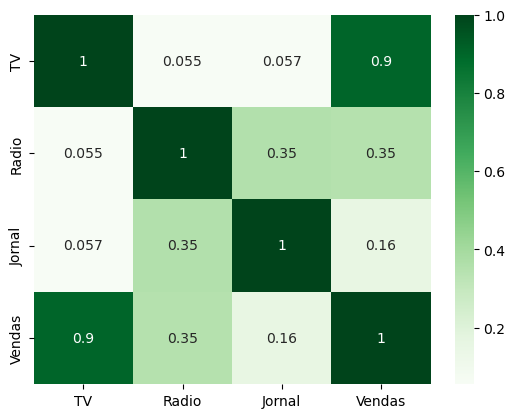

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlação -> Número que varia de -1 a 1. O quão junto as 2 coisas (variáveis) caminham.
# .corr -> faz a correlação entre os valores da tabela. Considerar a linha vendas com base em cada coluna
print(tabela.corr())

# criar um gráfico
    # plotly
    # matplotlib
    # seaborn
sns.heatmap(tabela.corr(),cmap = "Greens",annot = True)
# exibir o gráfico
# cmap -> Definir escala de cor
# annot -> inserir rótulo de dados 
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [ ]:
# Inteligência artificial
# dividir a tabela em 2 classes: Inputs (x); Output (y)
y = tabela['Vendas']
x = tabela[['TV','Radio','Jornal']]

# dividir a tabela em 2 partes: Dados de Treino e Dados de Teste
from sklearn.model_selection import train_test_split # função para separar em treino e teste

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.2) # função faz a separação de x em x_treino e x_teste; e faz separação de y em y_treino e y_teste -> Fazer sempre nessa ordem
# parâmetro test_size = 0.3 significa que 30% dos dados serão usados nos testes.
# parâmetro "randon_state=1" é para que a IA crie divisões aleatórias e ficar parado nela. 
# geralmente a proporção é de 70% para treino e 30% para teste ou 80% x 20%. 
## Pode ser usado o parâmetro "train_test_split(x,y, test_size=0.2)" para que ele faça nessa proporção de 20% dos dados


#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [ ]:
# importar a inteligência artificial
## sklearn é a principal biblioteca (pacote de código) para inteligência artificial 
from sklearn.linear_model import LinearRegression # importação da Regressão Linear
from sklearn.ensemble import RandomForestRegressor # importação da Arvore de Decisão

# criar a inteligência artificial
modelo_regressaolinear = LinearRegression() # Variável recebe a equação de regressão linear (criação do modelo)
modelo_arvoredecisao = RandomForestRegressor() # Variável recebe a equação da árvore de decisão (criação do modelo)

# treinar a inteligência artificial
modelo_regressaolinear.fit(x_treino,y_treino) # .fit -> função para treinar a variável que recebeu o modelo de regressão IA
modelo_arvoredecisao.fit(x_treino,y_treino) # .fit -> função para treinar a variável que recebeu o modelo de regressão IA
# ambos os modelos devem referenciar (receber) o x de treino com resultado no y de treino para preparação do modelo

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [ ]:
## Decidindo qual o melhor modelo a ser usado na IA!!

# fazendo a previsão dos modelos de AI escolhidos para ver quem se aproxima mais da resposta real 
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

# r2_score -> calcula o grau de certeza da previsão realizada (estatística)
# a regressão com melhor r2_score deve ser acatada como o modelo que melhor explica o comportamento desse processo/situação

0.8970522298668991
0.958380465100644


#### Visualização Gráfica das Previsões

,y_teste,Previsao Arvore Decisao,Previsao Regressao Linear
106,7.2,7.307,7.096514
29,10.5,11.071,10.162855
31,11.9,12.312,12.637721
12,9.2,8.585,9.728751
65,11.3,11.056,9.297398
113,20.9,19.229,18.274240
99,17.2,15.838,16.555464
158,7.3,6.594,9.244438
116,12.2,12.125,13.726726
28,18.9,19.777,21.156115


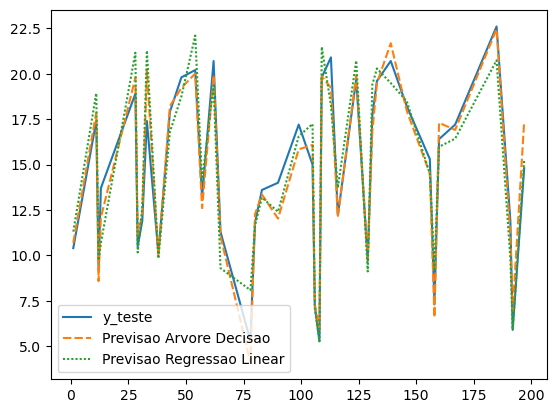

In [ ]:
# para criar previsão gráfica, é necessário fazer uma tabela auxiliar

tabela_aux = pd.DataFrame() #cria tabela em branco
tabela_aux['y_teste'] = y_teste # criação de coluna e iguala ao valor que ela receberá
tabela_aux['Previsao Arvore Decisao'] = previsao_arvoredecisao
tabela_aux['Previsao Regressao Linear'] = previsao_regressaolinear

sns.lineplot(data=tabela_aux) # criação (plotagem) do gráfico em linha
plt.show # mostra o gráfico criado

display(tabela_aux)

#### Como fazer uma nova previsão?

In [ ]:
# para aplicar a AI em novos valores cria-se outra base de dados com as mesmas colunas e aplica a previsão
nova_tabela = pd.read_csv('novos.csv') # leitura da nova tabela
display(nova_tabela)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [ ]:
previsao = modelo_arvoredecisao.predict(nova_tabela) # aplicação da previsão da AI com base na melhor regressão escolhida (arvore) nos novos dados
# previsao -> variável para receber os valores
# modelo_arvoredecisao -> modelo que melhor explicou o comportamento dos dados que foi criado na fase da criação da IA
# .predict -> método fazer a previsão com base no modelo criado
# (nova_tabela) -> tabela com novos valores para previsão do resultado

print(previsao)

[ 7.269  8.377 20.013]
